# Analysis of COVID-19/nCoV2019 on Economic Metrics globally

Importing necessary libraries and the datasets to be used

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # Removing limit for displaying the df columns
# importing the dataset
covid_df = pd.read_csv('owid-covid-data.csv')
wdi_df = pd.read_csv('WDICSV.csv')

Exploring the data

In [3]:
covid_df.info() # Basic info
covid_df.describe() # Statistical Summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  4.118040e+05  4.101590e+05        4.089290e+05  4.118040e+05   
mean   7.365292e+06  8.017360e+03        8.041026e+03  8.125957e+04   
std    4.477582e+07  2.296649e+05        8.661611e+04  4.411901e+05   
min    0.000000e+00  0.000000e+00        0.000000e+00  0.000000e+00   
25%    6.280750e+03  0.000000e+00        0.000000e+00  4.300000e+01   
50%    6.365300e+04  0.000000e+00        1.200000e+01  7.990000e+02   
75%    7.582720e+05  0.000000e+00        3.132900e+02  9.574000e+03   
max    7.758668e+08  4.423623e+07        6.319461e+06  7.057132e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  410608.000000        409378.000000            411804.000000   
mean       71.852139            72.060828            112096.199420   
std      1368.322990           513.636565            162240.412405   
min         0.000000             0.000000                 0.000000   
25%         0.000000             0.000000              1916.100000   
50%         0.000000             0.000000             29145.480000   
75%         0.000000             3.140000            156770.190000   
max    103719.000000         14817.000000            763598.600000   

       new_cases_per_million  new_cases_smoothed_per_million  \
count          410159.000000                   408929.000000   
mean              122.357073                      122.713852   
std              1508.778585                      559.701663   
min                 0.000000                        0.000000   
25%                 0.000000                        0.000000   
50%                 0.000000                        2.790000   
75%                 0.000000                       56.250000   
max            241758.230000                    34536.890000   

       total_deaths_per_million  new_deaths_per_million  \
count             411804.000000           410608.000000   
mean                 835.514337                0.762321   
std                 1134.932641                6.982532   
min                    0.000000                0.000000   
25%                   24.570000                0.000000   
50%                  295.090000                0.000000   
75%                 1283.820000                0.000000   
max                 6601.110000              893.660000   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                    409378.000000      184817.000000  39116.000000   
mean                          0.764530           0.911495    660.971418   
std                           2.546543           0.399925   2139.615532   
min                           0.000000          -0.070000      0.000000   
25%                           0.000000           0.720000     21.000000   
50%                           0.000000           0.950000     90.000000   
75%                           0.360000           1.140000    413.000000   
max                         127.660000           5.870000  28891.000000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count              39116.000000   40656.000000               40656.000000   
mean                  15.656337    3911.741563                 125.987984   
std                   22.785485    9845.750485                 151.155810   
min                    0.000000       0.000000                   0.000000   
25%                    2.330000     186.000000                  31.000000   
50%                    6.430000     776.000000                  74.235000   
75%                   18.780000    3051.000000                 159.760000   
max                  180.680000  154497.000000                1526.850000   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count           10993.000000                       10993.000000   
mean              317.894114                           9.672003   
std               514.412910                          13.

In [4]:
wdi_df.info() 
wdi_df.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403256 entries, 0 to 403255
Data columns (total 69 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    403256 non-null  object 
 1   Country Code    403256 non-null  object 
 2   Indicator Name  403256 non-null  object 
 3   Indicator Code  403256 non-null  object 
 4   1960            37417 non-null   float64
 5   1961            42757 non-null   float64
 6   1962            44040 non-null   float64
 7   1963            44974 non-null   float64
 8   1964            45471 non-null   float64
 9   1965            47312 non-null   float64
 10  1966            47572 non-null   float64
 11  1967            48217 non-null   float64
 12  1968            48829 non-null   float64
 13  1969            49612 non-null   float64
 14  1970            72657 non-null   float64
 15  1971            76790 non-null   float64
 16  1972            78517 non-null   float64
 17  1973      

1960          1961          1962          1963          1964  \
count  3.741700e+04  4.275700e+04  4.404000e+04  4.497400e+04  4.547100e+04   
mean   4.450943e+11  4.163134e+11  4.281904e+11  4.381389e+11  4.671439e+11   
std    1.945339e+13  1.968709e+13  2.070434e+13  2.175268e+13  2.326668e+13   
min   -2.594800e+14 -3.243190e+14 -3.675280e+14 -4.061760e+14 -4.462460e+14   
25%    4.482271e+00  4.544504e+00  4.606569e+00  4.691885e+00  4.766341e+00   
50%    3.678426e+01  3.790448e+01  3.679088e+01  3.646122e+01  3.736165e+01   
75%    1.000000e+05  8.456900e+04  7.712827e+04  7.647400e+04  8.909389e+04   
max    1.629370e+15  1.798670e+15  1.940930e+15  2.077620e+15  2.253700e+15   

               1965          1966          1967          1968          1969  \
count  4.731200e+04  4.757200e+04  4.821700e+04  4.882900e+04  4.961200e+04   
mean   5.134120e+11  5.531753e+11  6.023921e+11  6.779167e+11  7.464926e+11   
std    2.638414e+13  2.899102e+13  3.203375e+13  3.633862e+13  4.107226e+13   
min   -5.422810e+14 -6.431340e+14 -7.339950e+14 -8.208010e+14 -1.029100e+15   
25%    4.536776e+00  4.788581e+00  4.776287e+00  4.937060e+00  4.984750e+00   
50%    3.733812e+01  4.004050e+01  4.084800e+01  4.176322e+01  4.256918e+01   
75%    1.261390e+05  1.629168e+05  2.173000e+05  2.500000e+05  2.900000e+05   
max    2.637630e+15  2.941020e+15  3.271970e+15  3.743270e+15  4.324100e+15   

               1970          1971          1972          1973          1974  \
count  7.265700e+04  7.679000e+04  7.851700e+04  7.914500e+04  8.057600e+04   
mean   5.869068e+11  6.437300e+11  7.223452e+11  8.617372e+11  1.181497e+12   
std    3.759672e+13  4.260602e+13  4.864023e+13  5.769128e+13  8.206000e+13   
min   -1.193370e+15 -1.031210e+15 -1.176890e+15 -1.842130e+14 -1.316860e+14   
25%    2.994817e+00  3.214959e+00  3.376087e+00  3.458739e+00  3.553582e+00   
50%    2.671230e+01  2.868024e+01  2.991202e+01  3.091370e+01  3.265695e+01   
75%    1.700000e+05  1.145015e+05  1.600000e+05  1.920000e+05  2.584358e+05   
max    4.796630e+15  5.453840e+15  6.244590e+15  7.011690e+15  1.201490e+16   

               1975          1976          1977          1978          1979  \
count  8.408000e+04  8.635800e+04  8.887900e+04  8.960300e+04  9.057200e+04   
mean   1.202957e+12  1.337950e+12  1.293039e+12  1.118597e+12  1.069810e+12   
std    8.250456e+13  9.404990e+13  9.037861e+13  7.480777e+13  7.125234e+13   
min   -1.321370e+14 -1.491390e+14 -1.654080e+14 -1.650250e+14 -8.260260e+13   
25%    3.311026e+00  3.661158e+00  3.736212e+00  3.779726e+00  3.875904e+00   
50%    3.148556e+01  3.351905e+01  3.461132e+01  3.497726e+01  3.550000e+01   
75%    3.000000e+05  4.290618e+05  6.036460e+05  6.899136e+05  7.898980e+05   
max    1.136510e+16  1.320150e+16  1.249770e+16  1.002290e+16  1.066950e+16   

               1980          1981          1982          1983          1984  \
count  9.482600e+04  9.654800e+04  9.681600e+04  9.776300e+04  9.843100e+04   
mean   8.413846e+11  8.106988e+11  8.945684e+11  1.113698e+12  1.133820e+12   
std    5.251963e+13  4.932776e+13  5.564454e+13  6.810432e+13  7.083417e+13   
min   -7.648000e+12 -5.730630e+12 -4.975160e+12 -6.400980e+12 -9.346100e+12   
25%    4.000000e+00  3.841694e+00  3.763602e+00  3.924123e+00  4.030103e+00   
50%    3.708333e+01  3.655100e+01  3.697791e+01  3.729765e+01  3.760273e+01   
75%    7.918102e+05  7.916335e+05  9.500000e+05  9.606998e+05  9.900000e+05   
max    7.221390e+15  6.796720e+15  7.256680e+15  7.976010e+15  8.979220e+15   

               1985          1986          1987          1988          1989  \
count  1.004830e+05  1.014360e+05  1.018730e+05  1.013180e+05  1.028710e+05   
mean   1.222795e+12  1.130485e+12  1.149306e+12  8.834883e+11  9.619384e+11   
std    8.312157e+13  7.651722e+13  7.111429e+13  4.620184e+13  4.994806e+13   
min   -1.052930e+13 -1.690000e+13 -1.990000e+13 -9.764780e+13 -2.580000e+13   
25%    4.016534e+00  4.048932e+00  4.062446e+00  4.184484e+0

Data Pre-processing (COVID data)

In [5]:
covid_cols = [
    'iso_code', 'continent', 'location', 'date',
    'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
    'people_vaccinated', 'people_fully_vaccinated', 'population',
    'gdp_per_capita', 'human_development_index', 'stringency_index'
]
covid_df = covid_df[covid_cols].copy()
covid_df['date'] = pd.to_datetime(covid_df['date'], errors = 'coerce') # Convert date to date-time format
# covid_df = covid_df[(covid_df['year'] >= 2020) & (covid_df['year'] <= 2021)] 
covid_df = covid_df.dropna(subset=['iso_code', 'date', 'location']) # Remove empty rows and rows without iso code
covid_df = covid_df.replace(r'^\s*$', np.nan, regex=True) # Replace empty strings/blank cells with NaN

# handle missing numeric values
numeric_cols = [
    'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
    'people_vaccinated', 'people_fully_vaccinated', 'population',
    'gdp_per_capita', 'human_development_index', 'stringency_index'
] 

# Replace missing values with 0 for case/deaths column
covid_df[['total_cases', 'new_cases', 'total_deaths', 'new_deaths']] = (
    covid_df[['total_cases', 'new_cases', 'total_deaths', 'new_deaths']].fillna(0)
)

# Replace missing values with group-wise mean(by country)
covid_df[numeric_cols] = covid_df.groupby('location')[numeric_cols].transform(lambda x: x.fillna(x.mean()))

# Fill any remaining NaN (if a country's group mean couldn't be computed)
covid_df[numeric_cols] = covid_df[numeric_cols].fillna(covid_df[numeric_cols].mean())

covid_df = covid_df.drop_duplicates() # Drop duplicates
 
covid_df['year'] = covid_df['date'].dt.year # Create year column for yearly analysis
print('Dataset Summary : \n')
covid_df.info()

Dataset Summary : 

<class 'pandas.core.frame.DataFrame'>
Index: 169374 entries, 0 to 429434
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   iso_code                 169374 non-null  object        
 1   continent                158894 non-null  object        
 2   location                 169374 non-null  object        
 3   date                     169374 non-null  datetime64[ns]
 4   total_cases              169374 non-null  float64       
 5   new_cases                169374 non-null  float64       
 6   total_deaths             169374 non-null  float64       
 7   new_deaths               169374 non-null  float64       
 8   people_vaccinated        169374 non-null  float64       
 9   people_fully_vaccinated  169374 non-null  float64       
 10  population               169374 non-null  int64         
 11  gdp_per_capita           169374 non-null  float64       
 12  h

Data Pre-processing (WDI data)

In [6]:
wdi_df = wdi_df.rename(columns=lambda x: x.strip())

# Convert wide form to long form
wdi_long = wdi_df.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='year',
    value_name='value'
    )

# clean and convert years to numeric
wdi_long['year'] = pd.to_numeric(wdi_long['year'], errors='coerce')
# Year filteration
# wdi_df = wdi_df[(wdi_df['Year'] >= 2010) & (wdi_df['Year'] <= 2024)]
# Drop empty rows
wdi_long = wdi_long.dropna(subset=['year', 'value'])
# Pivotting indicators to columns
wdi_pivot = wdi_long.pivot_table(
    index=['Country Name', 'Country Code', 'year'],
    columns='Indicator Name',
    values='value'
).reset_index()

# Simplifying column names
wdi_pivot.columns = [col.replace(' ', '_').replace(',', '').replace('(', '').replace(')', '') for col in wdi_pivot.columns]

# Convert numeric columns
for col in wdi_pivot.select_dtypes(include='object').columns[3:]:
    wdi_pivot[col] = pd.to_numeric(wdi_pivot[col], errors='coerce')

print("WDI Dataset Summary:")
wdi_pivot.info()

WDI Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17225 entries, 0 to 17224
Columns: 1519 entries, Country_Name to Young_people_ages_15-24_newly_infected_with_HIV
dtypes: float64(1516), int64(1), object(2)
memory usage: 199.6+ MB


In [7]:
# Data Wrangling
covid_yearly = covid_df.groupby(['location', 'year']).agg({
    'total_cases': 'max',
    'total_deaths': 'max',
    'people_fully_vaccinated': 'max',
    'stringency_index': 'mean',
    'gdp_per_capita': 'mean',
    'population': 'mean',
    'human_development_index': 'mean'
}).reset_index()

covid_yearly.rename(columns={'location': 'Country_Name'}, inplace=True)


Merge both the datasets

In [8]:
merged_df = pd.merge(
    covid_yearly,
    wdi_pivot,
    on=['Country_Name', 'year'],
    how='inner'
)

print("Merged dataset shape:", merged_df.shape)
merged_df.head(5) # Peak into the merged dataset (top 5 rows)


Merged dataset shape: (935, 1526)


Country_Name  year  total_cases  total_deaths  people_fully_vaccinated  \
0  Afghanistan  2020      47641.0        1865.0             9.927816e+06   
1  Afghanistan  2021     157611.0        7325.0             9.927816e+06   
2  Afghanistan  2022     206545.0        7839.0             1.061563e+07   
3  Afghanistan  2023     229367.0        7965.0             1.783679e+07   
4  Afghanistan  2024     235214.0        7998.0             9.927816e+06   

   stringency_index  gdp_per_capita  population  human_development_index  \
0         42.480214         1803.99  41128772.0                     0.51   
1         28.688681         1803.99  41128772.0                     0.51   
2         12.056319         1803.99  41128772.0                     0.51   
3         27.603995         1803.99  41128772.0                     0.51   
4         27.603995         1803.99  41128772.0                     0.51   

  Country_Code  \
0          AFG   
1          AFG   
2          AFG   
3          AFG   
4          AFG   

   ARI_treatment_%_of_children_under_5_taken_to_a_health_provider  \
0                                                NaN                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                NaN                

   Access_to_clean_fuels_and_technologies_for_cooking_%_of_population  \
0                                               33.8                    
1                                               34.9                    
2                                               36.1                    
3                                                NaN                    
4                                                NaN                    

   Access_to_clean_fuels_and_technologies_for_cooking_rural_%_of_rural_population  \
0                                               16.4                                
1                                               17.4                                
2                                               18.5                                
3                                                NaN                                
4                                                NaN                                

   Access_to_clean_fuels_and_technologies_for_cooking_urban_%_of_urban_population  \
0                                               83.8                                
1                                               84.5                                
2                                               85.0                                
3                                                NaN                                
4                                                NaN                                

   Access_to_electricity_%_of_population  \
0                                   97.7   
1                                   97.7   
2                                   85.3   
3                                   85.3   
4                                    NaN   

   Access_to_electricity_rural_%_of_rural_population  \
0                                               97.1   
1                                               97.1   
2                                               81.7   
3                                               81.4   
4                                                NaN   

   Access_to_electricity_urban_%_of_urban_population  \
0                                               99.5   
1                                               99.5   
2                                               95.9   
3                                               96.0   
4                                                NaN   

   Account_ownership_at_a_financial_institution_or_with_a_mobile-money-service_provider_%_of_population_ages_15+  \
0                                               

Data Formatting

In [9]:
# Ensuring datatypes are consistent
merged_df['year'] = merged_df['year'].astype(int)
merged_df['Country_Name'] = merged_df['Country_Name'].astype(str)

# Handle any missing values after merging
merged_df = merged_df.fillna(0)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Columns: 1526 entries, Country_Name to Young_people_ages_15-24_newly_infected_with_HIV
dtypes: float64(1523), int64(1), object(2)
memory usage: 10.9+ MB


Data Binning & Finalization

In [10]:
# Bin 1: GDP per capita 
merged_df['GDP_Level'] = pd.cut(
    merged_df['gdp_per_capita'],
    bins=[0, 5000, 20000, 50000, 100000, np.inf],
    labels=['Low', 'Lower-Middle', 'Upper-Middle', 'High', 'Very High']
)

# Bin 2: Stringency Index 
merged_df['Lockdown_Strength'] = pd.cut(
    merged_df['stringency_index'],
    bins=[0, 30, 60, 100],
    labels=['Low', 'Moderate', 'Strict']
)

In [11]:
print("Final Dataset Overview:")
print(merged_df.shape)
print(merged_df.head(5))
merged_df.describe() # Statistical summary of the final dataset

Final Dataset Overview:
(935, 1528)
  Country_Name  year  total_cases  total_deaths  people_fully_vaccinated  \
0  Afghanistan  2020      47641.0        1865.0             9.927816e+06   
1  Afghanistan  2021     157611.0        7325.0             9.927816e+06   
2  Afghanistan  2022     206545.0        7839.0             1.061563e+07   
3  Afghanistan  2023     229367.0        7965.0             1.783679e+07   
4  Afghanistan  2024     235214.0        7998.0             9.927816e+06   

   stringency_index  gdp_per_capita  population  human_development_index  \
0         42.480214         1803.99  41128772.0                     0.51   
1         28.688681         1803.99  41128772.0                     0.51   
2         12.056319         1803.99  41128772.0                     0.51   
3         27.603995         1803.99  41128772.0                     0.51   
4         27.603995         1803.99  41128772.0                     0.51   

  Country_Code  \
0          AFG   
1          AFG

year   total_cases  total_deaths  people_fully_vaccinated  \
count   935.00000  9.350000e+02  9.350000e+02             9.350000e+02   
mean   2022.00000  5.533418e+06  6.289380e+04             5.151297e+07   
std       1.41497  4.387854e+07  4.507181e+05             3.558167e+08   
min    2020.00000  0.000000e+00  0.000000e+00             6.772333e+03   
25%    2021.00000  1.851150e+04  1.675000e+02             4.306440e+05   
50%    2022.00000  1.571810e+05  1.973000e+03             2.915726e+06   
75%    2023.00000  1.094488e+06  1.232800e+04             1.080404e+07   
max    2024.00000  7.758668e+08  7.057132e+06             5.177943e+09   

       stringency_index  gdp_per_capita    population  \
count        935.000000      935.000000  9.350000e+02   
mean          42.178114    18866.722202  8.380298e+07   
std           13.946172    18775.920110  5.998082e+08   
min            0.000000      661.240000  1.133500e+04   
25%           35.803498     4541.800000  9.297690e+05   
50%           41.854487    14048.880000  6.812344e+06   
75%           51.039903    25063.850000  2.620798e+07   
max           84.971181   116935.600000  7.975105e+09   

       human_development_index  \
count               935.000000   
mean                  0.724433   
std                   0.142984   
min                   0.390000   
25%                   0.620000   
50%                   0.722223   
75%                   0.820000   
max                   0.960000   

       ARI_treatment_%_of_children_under_5_taken_to_a_health_provider  \
count                                         935.000000                
mean                                            0.555187                
std                                             6.488810                
min                                             0.000000                
25%                                             0.000000                
50%                                             0.000000                
75%                                             0.000000                
max                                            94.200000                

       Access_to_clean_fuels_and_technologies_for_cooking_%_of_population  \
count                                         935.000000                    
mean                                           36.589435                    
std                                            43.571812                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             1.500000                    
75%                                            91.900000                    
max                                           100.000000                    

       Access_to_clean_fuels_and_technologies_for_cooking_rural_%_of_rural_population  \
count                                         935.000000                                
mean                                           32.147039                                
std                                            42.618143                                
min                                             0.000000                                
25%                                             0.000000                                
50%                                             0.300000                                
75%                                            82.950000                                
max                                           100.000000                                

       Access_to_clean_fuels_and_technologies_for_cooking_urban_%_of_urban_population  \
count                                         935.000000                                
mean                                           41.100063                                
std                                            45.446379                                
min            

In [12]:
# Feature Engineering: Create growth and normalized metrics
merged_df = merged_df.sort_values(by=['Country_Name', 'year'])

# Calculate GDP Growth Rate and name it 'gdp_change'
if 'GDP_growth_annual_%' in merged_df.columns:
    merged_df.rename(columns={'GDP_growth_annual_%': 'gdp_change'}, inplace=True)
else:
    # If not present, calculate it manually
    merged_df['gdp_change'] = merged_df.groupby('Country_Name')['gdp_per_capita'].pct_change() * 100

# Create normalized metrics for cases and deaths
merged_df['cases_per_million'] = (merged_df['total_cases'] / merged_df['population']) * 1_000_000
merged_df['deaths_per_million'] = (merged_df['total_deaths'] / merged_df['population']) * 1_000_000

# Fill any NaN values that resulted from calculations (excluding categorical columns)
numeric_columns = merged_df.select_dtypes(include=[np.number]).columns
merged_df[numeric_columns] = merged_df[numeric_columns].fillna(0)

print("Feature engineering complete. 'gdp_change', 'cases_per_million', and 'deaths_per_million' are created.")
merged_df[['Country_Name', 'year', 'gdp_change', 'cases_per_million']].head()

Feature engineering complete. 'gdp_change', 'cases_per_million', and 'deaths_per_million' are created.


Country_Name  year  gdp_change  cases_per_million
0  Afghanistan  2020   -2.351101        1158.337526
1  Afghanistan  2021  -20.738839        3832.134837
2  Afghanistan  2022   -6.240172        5021.910209
3  Afghanistan  2023    2.266944        5576.801564
4  Afghanistan  2024    0.000000        5718.964816

### Data Visualization and Interpretation

Global GDP trend (Before vs After COVID-19)

Available GDP columns: ['GDP_per_capita_constant_2015_US$', 'GDP_per_capita_constant_LCU', 'GDP_per_capita_current_LCU', 'GDP_per_capita_current_US$', 'GDP_per_capita_growth_annual_%', 'GDP_per_capita_PPP_constant_2021_international_$', 'GDP_per_capita_PPP_current_international_$', 'Government_expenditure_per_student_primary_%_of_GDP_per_capita', 'Government_expenditure_per_student_secondary_%_of_GDP_per_capita', 'Government_expenditure_per_student_tertiary_%_of_GDP_per_capita', 'Gross_capital_formation_%_of_GDP', 'Gross_fixed_capital_formation_%_of_GDP', 'Gross_fixed_capital_formation_private_sector_%_of_GDP', 'Market_capitalization_of_listed_domestic_companies_%_of_GDP']

Available years in dataset: [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]


C:\Users\mahan\AppData\Local\Temp\ipykernel_16160\1924792756.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_decline['%_change'].values, y=top10_decline.index, palette='Reds_r')


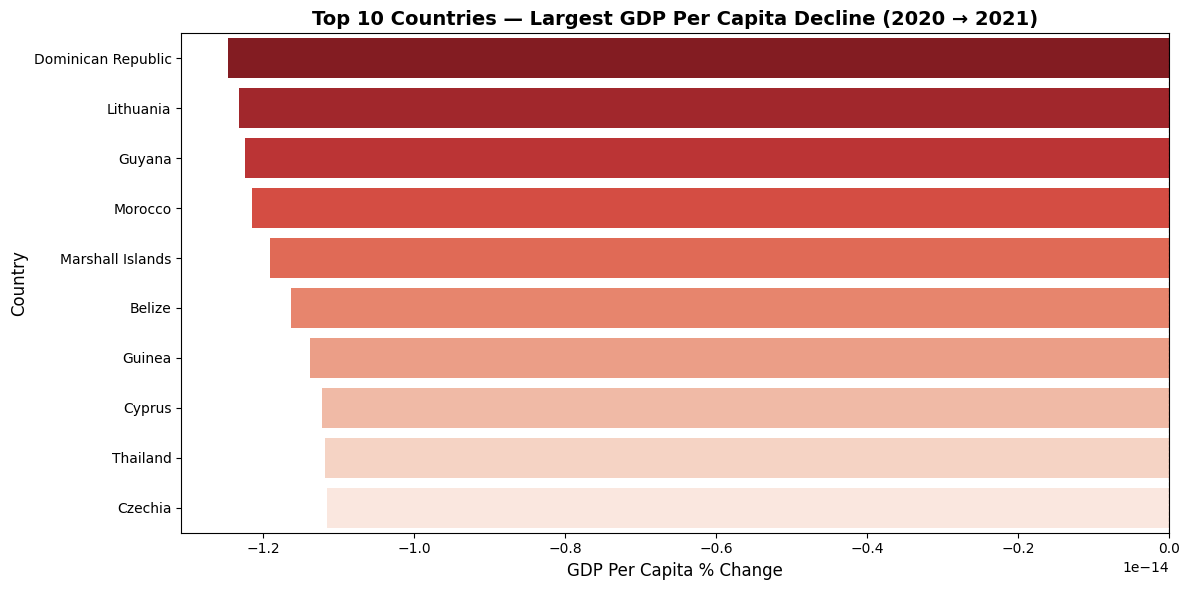

In [ ]:
gdp_cols = [col for col in merged_df.columns if 'GDP' in col and 'capita' in col]
print(f"Available GDP columns: {gdp_cols}")

print(f"\nAvailable years in dataset: {sorted(merged_df['year'].unique())}") # Check available years in the dataset

# Use the gdp_per_capita from COVID data for the visualization
available_years = merged_df['year'].unique()
target_years = [y for y in [2019, 2020, 2021] if y in available_years]

if len(target_years) >= 2:
    covid_years = merged_df[merged_df['year'].isin(target_years)].copy()
    
    # Calculate GDP per capita change from first to last available year
    gdp_pivot = covid_years.pivot_table(index='Country_Name', 
                                        columns='year',
                                        values='gdp_per_capita',
                                        aggfunc='first')
    
    start_year = min(target_years)
    end_year = max(target_years)
    
    # If-Else block for using countries which only have start date and end date
    if start_year in gdp_pivot.columns and end_year in gdp_pivot.columns:
        gdp_pivot = gdp_pivot.dropna(subset=[start_year, end_year])
        gdp_pivot['%_change'] = ((gdp_pivot[end_year] - gdp_pivot[start_year]) / gdp_pivot[start_year]) * 100
        
        # top 10 countries with largest decline plot
        top10_decline = gdp_pivot.sort_values('%_change').head(10)
        
        plt.figure(figsize=(12, 6))
        sns.barplot(x=top10_decline['%_change'].values, y=top10_decline.index, palette='Reds_r')
        plt.title(f"Top 10 Countries — Largest GDP Per Capita Decline ({start_year} → {end_year})", 
                  fontsize=14,
                  fontweight='bold')
        plt.xlabel("GDP Per Capita % Change", fontsize=12)
        plt.ylabel("Country", fontsize=12)
        plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Error: Could not find data for years {start_year} and {end_year}")
else:
    print("Not enough years available in the dataset for comparison.")

COVID-19 Cases vs Economic Impact

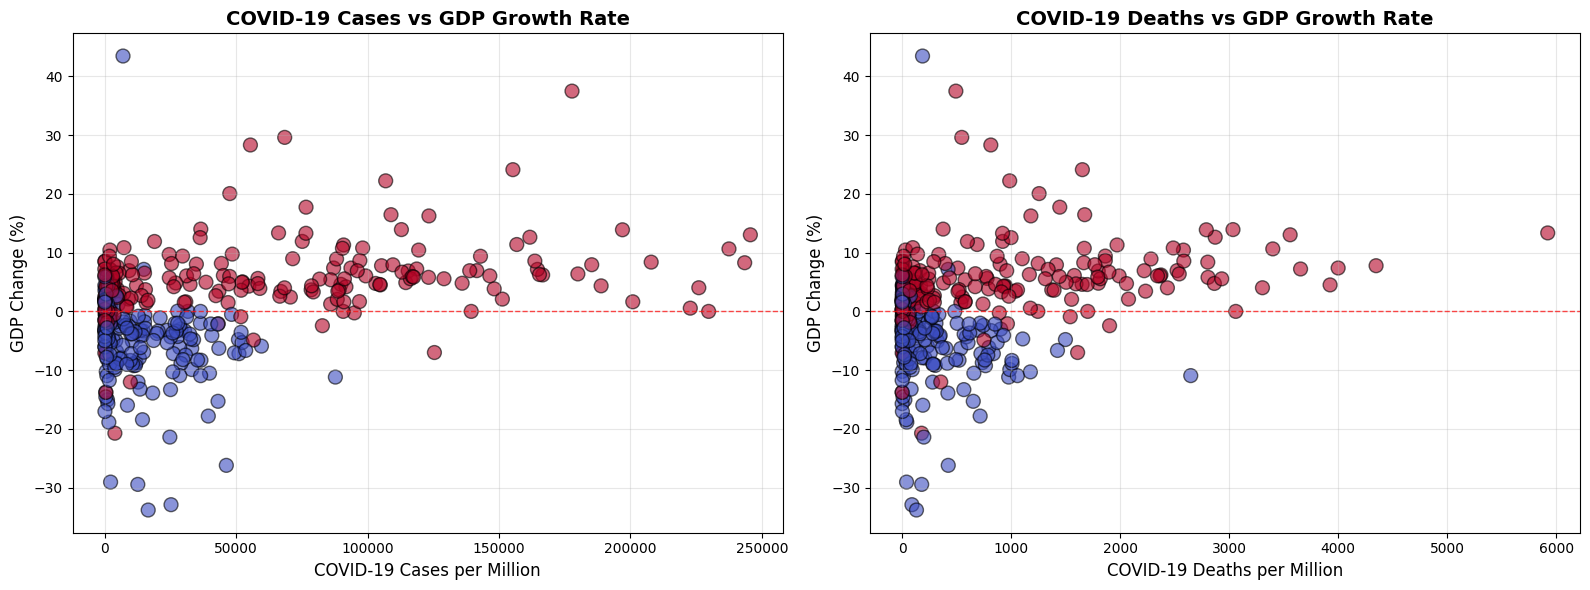

In [15]:
# Scatter plot: COVID cases per million vs GDP change
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Filter data for 2020-2021
covid_impact = merged_df[merged_df['year'].isin([2020, 2021])].copy()

# Plot 1: Cases per million vs GDP change
axes[0].scatter(covid_impact['cases_per_million'], covid_impact['gdp_change'], 
                alpha=0.6, s=100, c=covid_impact['year'], cmap='coolwarm', edgecolors='black')
axes[0].set_xlabel('COVID-19 Cases per Million', fontsize=12)
axes[0].set_ylabel('GDP Change (%)', fontsize=12)
axes[0].set_title('COVID-19 Cases vs GDP Growth Rate', fontsize=14, fontweight='bold')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.7)
axes[0].grid(True, alpha=0.3)

# Plot 2: Deaths per million vs GDP change
axes[1].scatter(covid_impact['deaths_per_million'], covid_impact['gdp_change'], 
                alpha=0.6, s=100, c=covid_impact['year'], cmap='coolwarm', edgecolors='black')
axes[1].set_xlabel('COVID-19 Deaths per Million', fontsize=12)
axes[1].set_ylabel('GDP Change (%)', fontsize=12)
axes[1].set_title('COVID-19 Deaths vs GDP Growth Rate', fontsize=14, fontweight='bold')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.7)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Stringency Index (Lockdown Measures) vs Economic Metrics

C:\Users\mahan\AppData\Local\Temp\ipykernel_16160\2668512128.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_2020, x='Lockdown_Strength', y='gdp_change',


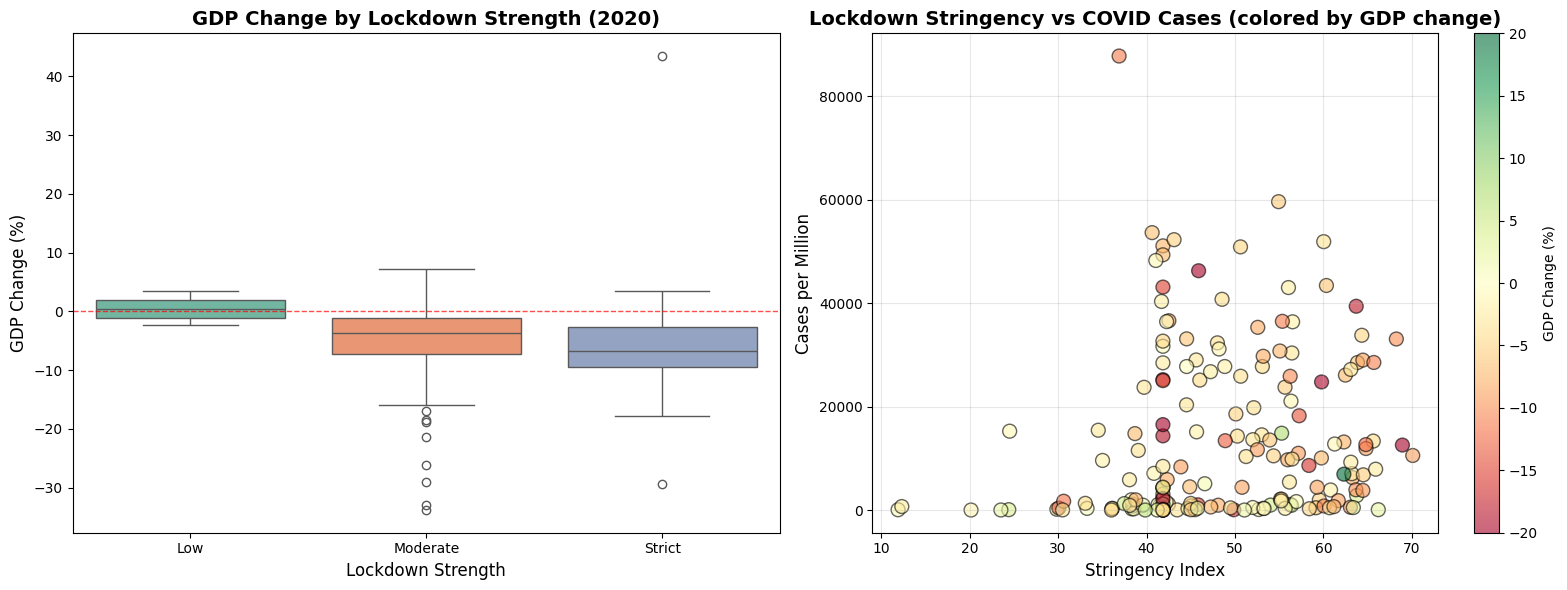

In [ ]:
# Analyze the relationship between lockdown stringency and economic impact
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Data (FY2020)
data_2020 = merged_df[merged_df['year'] == 2020].copy()
data_2020 = data_2020[data_2020['stringency_index'] > 0]  # Remove countries with no data

# Plot 1: Stringency Index vs GDP Change by Lockdown Strength
if 'Lockdown_Strength' in data_2020.columns:
    sns.boxplot(data=data_2020, x='Lockdown_Strength', y='gdp_change', 
                palette='Set2', ax=axes[0])
    axes[0].set_title('GDP Change by Lockdown Strength (2020)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Lockdown Strength', fontsize=12)
    axes[0].set_ylabel('GDP Change (%)', fontsize=12)
    axes[0].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.7)
else:
    # Alternative visualization if categorical column not available
    axes[0].scatter(data_2020['stringency_index'], data_2020['gdp_change'], 
                   alpha=0.6, s=100, edgecolors='black')
    axes[0].set_xlabel('Stringency Index', fontsize=12)
    axes[0].set_ylabel('GDP Change (%)', fontsize=12)
    axes[0].set_title('Stringency Index vs GDP Change (2020)', fontsize=14, fontweight='bold')
    axes[0].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.7)
    axes[0].grid(True, alpha=0.3)

# Plot 2: Stringency Index vs Cases per Million
axes[1].scatter(data_2020['stringency_index'], data_2020['cases_per_million'], 
                alpha=0.6, s=100, c=data_2020['gdp_change'], cmap='RdYlGn', 
                edgecolors='black', vmin=-20, vmax=20)
axes[1].set_xlabel('Stringency Index', fontsize=12)
axes[1].set_ylabel('Cases per Million', fontsize=12)
axes[1].set_title('Lockdown Stringency vs COVID Cases (colored by GDP change)', 
                  fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
cbar = plt.colorbar(axes[1].collections[0], ax=axes[1])
cbar.set_label('GDP Change (%)', fontsize=10)

plt.tight_layout()
plt.show()

Global Trends: COVID-19 Timeline

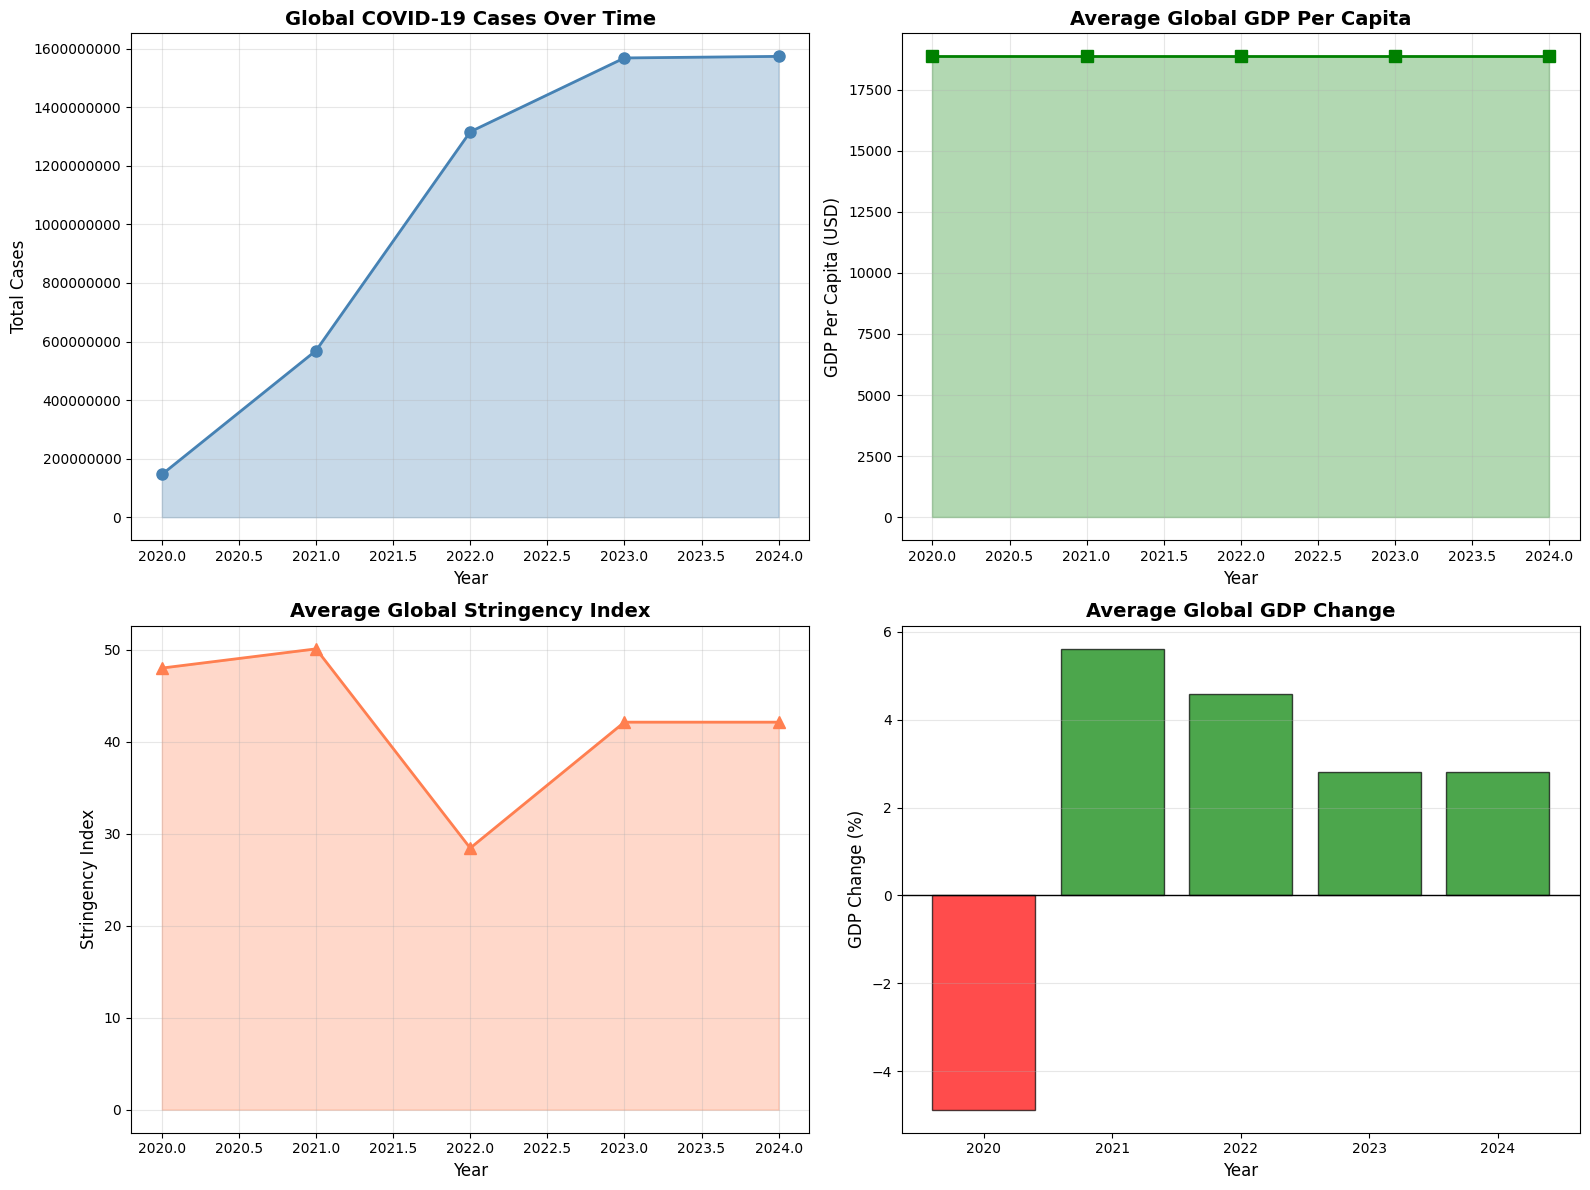

In [17]:
# Global aggregated trends over time
global_trends = merged_df.groupby('year').agg({
    'total_cases': 'sum',
    'total_deaths': 'sum',
    'gdp_per_capita': 'mean',
    'stringency_index': 'mean',
    'gdp_change': 'mean'
}).reset_index()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Total Cases Over Time
axes[0, 0].plot(global_trends['year'], global_trends['total_cases'], 
                marker='o', linewidth=2, markersize=8, color='steelblue')
axes[0, 0].fill_between(global_trends['year'], global_trends['total_cases'], alpha=0.3, color='steelblue')
axes[0, 0].set_title('Global COVID-19 Cases Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Total Cases', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].ticklabel_format(style='plain', axis='y')

# Plot 2: Average GDP Per Capita
axes[0, 1].plot(global_trends['year'], global_trends['gdp_per_capita'], 
                marker='s', linewidth=2, markersize=8, color='green')
axes[0, 1].fill_between(global_trends['year'], global_trends['gdp_per_capita'], alpha=0.3, color='green')
axes[0, 1].set_title('Average Global GDP Per Capita', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year', fontsize=12)
axes[0, 1].set_ylabel('GDP Per Capita (USD)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Average Stringency Index
axes[1, 0].plot(global_trends['year'], global_trends['stringency_index'], 
                marker='^', linewidth=2, markersize=8, color='coral')
axes[1, 0].fill_between(global_trends['year'], global_trends['stringency_index'], alpha=0.3, color='coral')
axes[1, 0].set_title('Average Global Stringency Index', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year', fontsize=12)
axes[1, 0].set_ylabel('Stringency Index', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Average GDP Change
axes[1, 1].bar(global_trends['year'], global_trends['gdp_change'], 
               color=['red' if x < 0 else 'green' for x in global_trends['gdp_change']], 
               alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Average Global GDP Change', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Year', fontsize=12)
axes[1, 1].set_ylabel('GDP Change (%)', fontsize=12)
axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

Regional Analysis by GDP Level

C:\Users\mahan\AppData\Local\Temp\ipykernel_16160\3754599911.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gdp_level_data, x='GDP_Level', y='cases_per_million',
C:\Users\mahan\AppData\Local\Temp\ipykernel_16160\3754599911.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gdp_level_data, x='GDP_Level', y='deaths_per_million',
C:\Users\mahan\AppData\Local\Temp\ipykernel_16160\3754599911.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gdp_level_data, x='GDP_Level', y='gdp_change',
C:\Users\mahan\AppData\Local\Temp\i

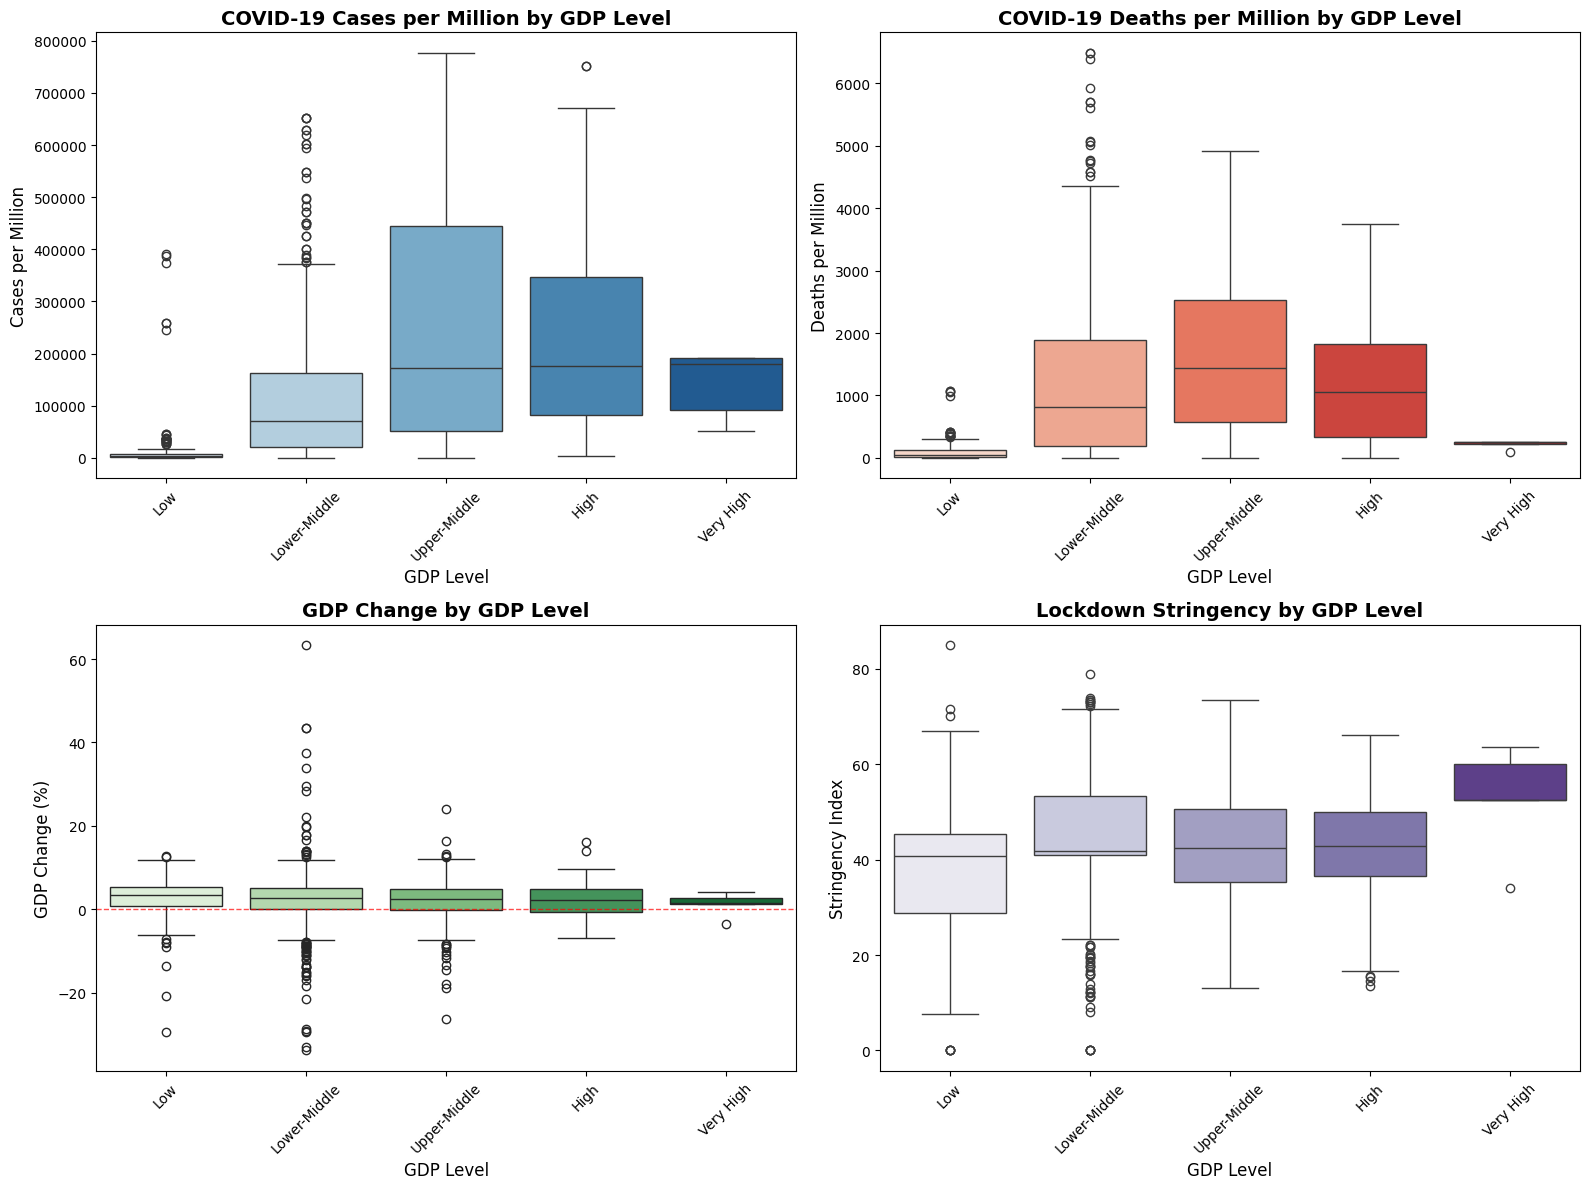

In [ ]:
# Compare different GDP levels and their COVID-19 response and impact
if 'GDP_Level' in merged_df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Remove any NaN in GDP_Level for clean visualization
    gdp_level_data = merged_df[merged_df['GDP_Level'].notna()].copy()
    
    # Plot 1: Cases per million by GDP Level
    sns.boxplot(data=gdp_level_data, x='GDP_Level', y='cases_per_million', 
                palette='Blues', ax=axes[0, 0])
    axes[0, 0].set_title('COVID-19 Cases per Million by GDP Level', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('GDP Level', fontsize=12)
    axes[0, 0].set_ylabel('Cases per Million', fontsize=12)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Plot 2: Deaths per million by GDP Level
    sns.boxplot(data=gdp_level_data, x='GDP_Level', y='deaths_per_million', 
                palette='Reds', ax=axes[0, 1])
    axes[0, 1].set_title('COVID-19 Deaths per Million by GDP Level', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('GDP Level', fontsize=12)
    axes[0, 1].set_ylabel('Deaths per Million', fontsize=12)
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Plot 3: GDP Change by GDP Level
    sns.boxplot(data=gdp_level_data, x='GDP_Level', y='gdp_change', 
                palette='Greens', ax=axes[1, 0])
    axes[1, 0].set_title('GDP Change by GDP Level', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('GDP Level', fontsize=12)
    axes[1, 0].set_ylabel('GDP Change (%)', fontsize=12)
    axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.7)
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Plot 4: Stringency Index by GDP Level
    sns.boxplot(data=gdp_level_data, x='GDP_Level', y='stringency_index', 
                palette='Purples', ax=axes[1, 1])
    axes[1, 1].set_title('Lockdown Stringency by GDP Level', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('GDP Level', fontsize=12)
    axes[1, 1].set_ylabel('Stringency Index', fontsize=12)
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
else:
    print("GDP_Level categorical column not found. Skipping GDP level comparison.")